In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [35]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [36]:
df.duplicated().sum()


np.int64(653)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Height')

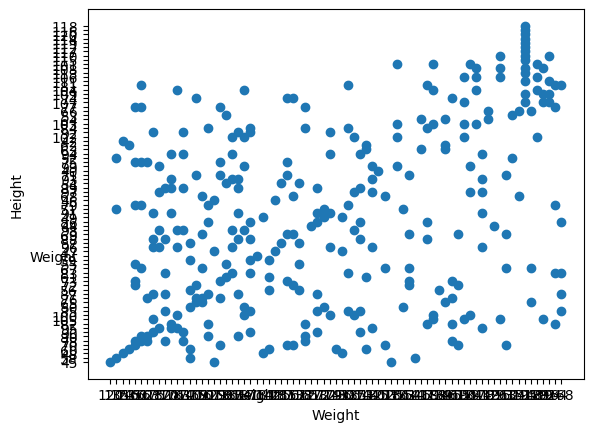

In [39]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [43]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

In [ ]:

df.fillna(df.mean(), inplace=True)
df.isna().sum()

Weight    0
Height    0
dtype: int64

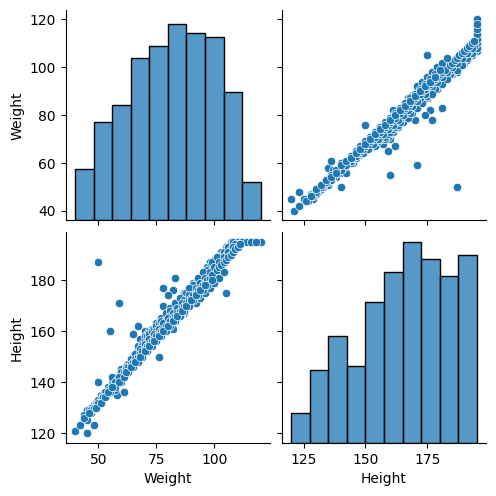

In [56]:
sns.pairplot(df)

In [57]:
df.head()

,Weight,Height
0,45.0,120.0
1,58.0,135.0
2,48.0,123.0
3,60.0,145.0
4,70.0,160.0


In [58]:
x=df[['Weight']]
y=df['Height']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [61]:
from sklearn.linear_model import LinearRegression
Regression=LinearRegression()

In [62]:
Regression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


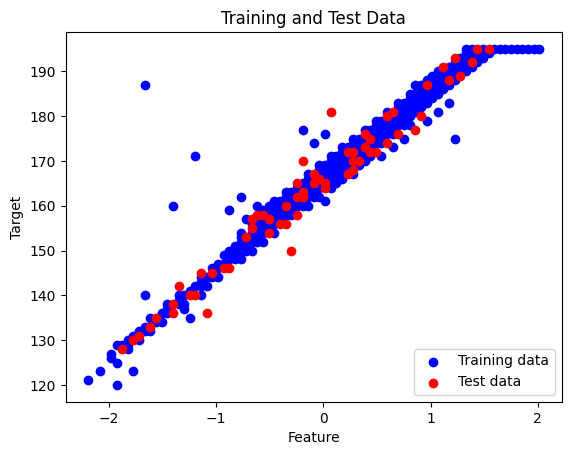

In [70]:
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training and Test Data')
plt.legend()
plt.show(block=True)

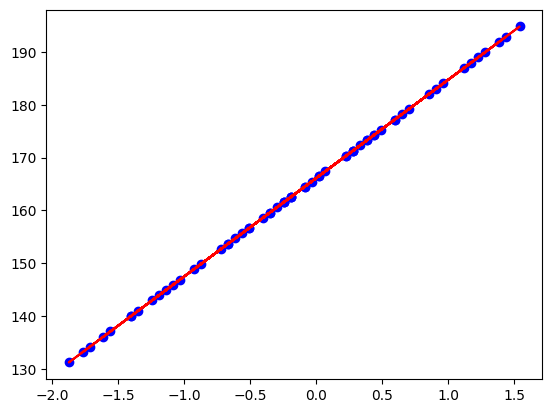

In [80]:
plt.plot(x_test, Regression.predict(x_test), color='red', label='Regression line')
plt.scatter(x_test, Regression.predict(x_test), color='blue', label='Regression line')

In [81]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, Regression.predict(x_test))
print(f"R^2 Score: {r2}")

R^2 Score: 0.9574741244708697


In [84]:
#display adjusted R-squared
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9567769789703922

In [87]:
Regression.predict(scaler.transform([[74]]))

c:\Users\am536\OneDrive\Documents\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.60304806])